In [2]:
import math as math
import numpy as np
import matplotlib.pylab as plt 
import sklearn as sklearn
from sklearn.cross_validation import train_test_split
import scipy
from scipy import stats
%matplotlib inline 

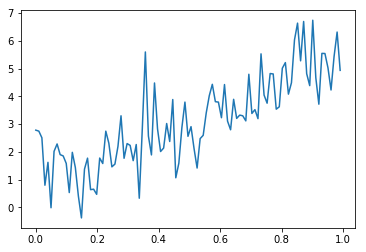

In [4]:
## Syntetyczny zbiór danych z dużym szumem ale liniowymi danymi
np.random.seed(123456789)

def y(x,m,b,mu=0,sigma=1.0): 
    return m*x + b + np.random.normal(mu,sigma,1)[0]

N = 101
M = 2
t = np.empty(N)
domain_bound = 1.0/N
domain = np.empty(N)

for i in range(N): 
    domain[i] = i*domain_bound
    
for i in range(N): 
    t[i] = y(x=domain[i],m=4.89,b=0.57)

plt.plot(domain, t)

matrix([[ 1.37609954,  1.47584226,  3.02934473]])

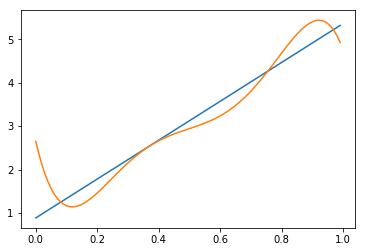

In [35]:
class ToyLinearRegression:
        def __init__(self, phi):
            self.phi=phi
        def fit(self,domain,t):
            U=np.matrix([self.phi(x) for x in domain])
            U_t=U.transpose()
            U_psedo=np.linalg.inv(U_t.dot(U))
            self.w=U_psedo.dot(U_t).dot(t)
        def predict(self,x):
            return np.inner(self.w,self.phi(x)).item() 
model=ToyLinearRegression(phi=lambda x: [1, x])
model.fit(domain, t)
w_pred=model.w
assert np.abs(w_pred - np.array([0.88610652, 4.47519348])).max() < 0.05
model.predict(12)
plt.plot(domain, [model.predict(x) for x in domain])
model2=ToyLinearRegression(phi=lambda x: [1, x,x**2,x**3,x**4,x**5])#model dla 5 funkcji wielomianowych
model2.fit(domain, t)
plt.plot(domain, [model2.predict(x) for x in domain])
model3=ToyLinearRegression(phi=lambda x: [1,x,x**2])#model dla 3 funkcji 
model3.fit(domain, t)
model3.w

In [8]:
def prior(w, C, mean=[0.0, 3.0, 0.0]):
    #assert w.ndim == 2
    
    sigma = np.zeros(shape=(w.shape[1], w.shape[1]))
    sigma[0,0] = 200 # Bias slabo zregularyzowany
    
    # Mozna ladniej zapisac
    for id in range(1, w.shape[1]):
        sigma[id, id] = C # Duze C -> malo zregularyzowany
    #print sigma    
    return scipy.stats.multivariate_normal.pdf(w,mean,sigma)
def loglikelihood(w, X, Y, phi=lambda x: [1, x], sigma=1.0):
    U=[scipy.stats.norm.pdf(np.inner(phi(X[i]),w),Y[i],sigma) for i in range(len(X))]
    return np.log(U).sum()
def logposterior(w, X, Y,prior ,phi=lambda x: [1, x], sigma=1.0,):
    return loglikelihood(w, X, Y, phi,sigma)+np.log(prior)
def draw(knowledge):
    X=[[y[0] for y in x] for x in knowledge]
    Y=[[y[1] for y in x] for x in knowledge]
    Z=[[y[2] for y in x] for x in knowledge]
    plt.pcolormesh(X,Y,Z, cmap='RdBu')
    plt.colorbar()
    plt.show()

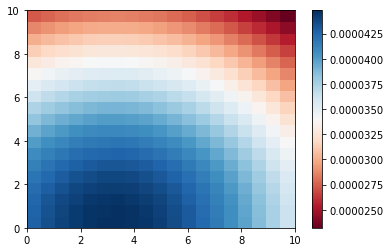

In [32]:
C=100
#Prior
I=np.linspace(0, 10, num=20)
knowledge1=[[[x,y,prior(np.array([[0.88,x,y]]),C=100)] for x in I] for y in I]
draw(knowledge1)

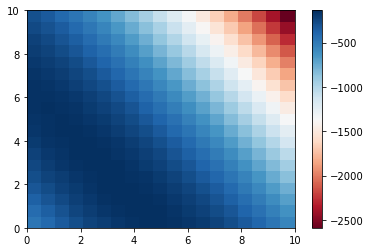

In [55]:
#loglikelihood
I=np.linspace(0, 10, num=20)
knowledge=[[[x,y,loglikelihood(np.array([[0.88,x,y]]),domain,t,lambda x: [1, x,x**2])] for x in I] for y in I]
draw(knowledge2)


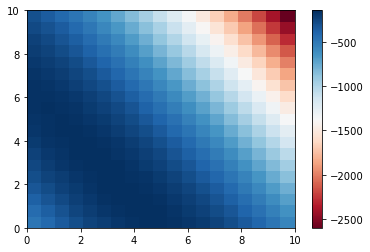

In [58]:
#logposterior
knowledge=[[[x,y,loglikelihood(np.array([[0.88,x,y]]),domain,t,lambda x: [1, x,x**2],sigma=1.0)+np.log(prior(np.array([[0.88,x,y]]),C=100))] for x in I] for y in I]
draw(knowledge)

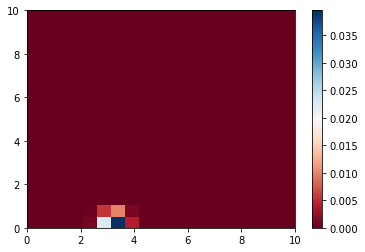

In [33]:
#C=0.1
#Prior
I=np.linspace(0, 10, num=20)
knowledge1=[[[x,y,prior(np.array([[0.88,x,y]]),C=0.1)] for x in I] for y in I]
draw(knowledge1)


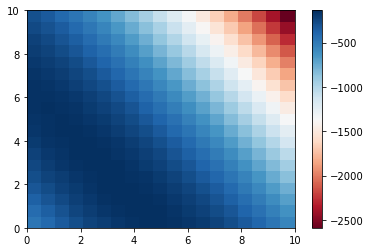

In [52]:
#loglikelihood
I=np.linspace(0, 10, num=20)
knowledge2=[[[x,y,loglikelihood(np.array([[0.88,x,y]]),domain,t,lambda x: [1, x,x**2],sigma=1)] for x in I] for y in I]
draw(knowledge2)

C:\Users\kuba\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


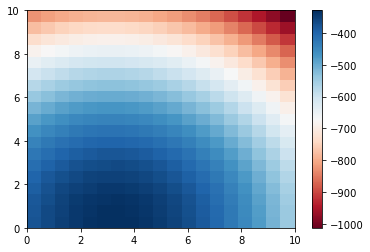

In [107]:
#logposterior
knowledge=[[[x,y,loglikelihood(np.array([[0.88,x,y]]),domain,t,lambda x: [1, x,x**2],sigma=10)+np.log(prior(np.array([[0.88,x,y]]),C=0.1))] for x in I] for y in I]
draw(knowledge)
#nie przypomina wykresu prior ale jeśli węźmiemy log prior to już będzie 

C:\Users\kuba\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


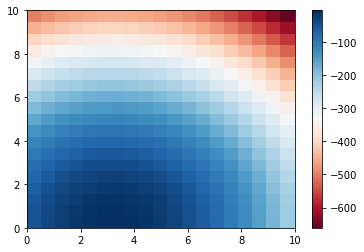

3

In [100]:
I=np.linspace(0, 10, num=20)
knowledge1=[[[x,y,np.log(prior(np.array([[0.88,x,y]]),C=0.1))] for x in I] for y in I]
draw(knowledge1)



In [109]:

def chose_max(knowledge):
    X=np.array([[y[0] for y in x] for x in knowledge]).flatten()
    Y=np.array([[y[1] for y in x] for x in knowledge]).flatten()
    Z=np.array([[y[2] for y in x] for x in knowledge])
    return [X[Z.argmax()],Y[Z.argmax()]]
#loglikehood
print chose_max(knowledge)

[3.6842105263157894, 1.0526315789473684]


In [111]:
knowledge=[[[x,y,loglikelihood(np.array([[0.88,x,y]]),domain,t,lambda x: [1, x,x**2])] for x in I] for y in I]
print"parametry w1,w2 maximalizujące loglikelihood", chose_max(knowledge)
knowledge=[[[x,y,loglikelihood(np.array([[0.88,x,y]]),domain,t,lambda x: [1, x,x**2],sigma=10)+np.log(prior(np.array([[0.88,x,y]]),C=100))] for x in I] for y in I]
print"parametry w1,w2 maximalizujące logposterior dla C=100", chose_max(knowledge)
knowledge=[[[x,y,loglikelihood(np.array([[0.88,x,y]]),domain,t,lambda x: [1, x,x**2],sigma=10)+np.log(prior(np.array([[0.88,x,y]]),C=0.1))] for x in I] for y in I]
print"parametry w1,w2 maximalizujące logposterior dla C=0.1", chose_max(knowledge)
#Dla dużego C loglikelihood i logposterior są prawie takie same więc także mają maximum w tych samych miejscach
#Dla mniejszego C duże znaczanie ma już Poserior co pokazuje i miejsce max(logposetrior) jest w podobnym miejcu co maximum 
#z którego braliśmy rozkład dla wektora parametrów w

parametry w1,w2 maximalizujące loglikelihood [3.6842105263157894, 1.0526315789473684]
parametry w1,w2 maximalizujące logposterior dla C=100 [3.6842105263157894, 1.0526315789473684]
parametry w1,w2 maximalizujące logposterior dla C=0.1 [3.1578947368421053, 0.0]


C:\Users\kuba\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in log


w zadania wcześniejszego [[ 1.37609954  1.47584226  3.02934473]]
w= [[ 2.72298538  0.26041589  0.26294908]]
Suma błędów dla C=0.01 32.1417534204
w= [[ 1.40782609  0.70550579  3.98592909]]
Suma błędów dla C=100 19.6419974633
w dla C=0.01 [[ 2.83269043  0.32174405  0.33367675]]
w dla C=1000000 [[ 1.37609918  1.47584486  3.02934194]]
w dla C=1 [[ 1.37612587  1.94487878  2.32220952]]


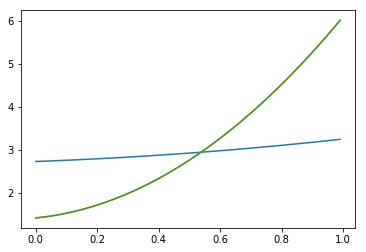

In [67]:
print "w zadania wcześniejszego" ,model3.w
class ToyBayesianLinearRegression:
        def __init__(self, phi, C):
            self.phi=phi
            self.lam=1.0/C
        def fit(self,domain,t):
            U=np.matrix([self.phi(x) for x in domain])
            U_t=U.transpose()
            X=U_t.dot(U)
            I=np.eye(X.shape[0])
            I[0][0]=0 #biasu nie regularyzujemy
            I=self.lam*I
            U_psedo=np.linalg.inv(X+I)
            self.w=U_psedo.dot(U_t).dot(t)
        def predict(self,x):
            return np.inner(self.w,self.phi(x)).item() 
X_train, X_test, Y_train, Y_test = train_test_split(domain,t, random_state=1)

model = ToyBayesianLinearRegression(C=0.01, phi=lambda x: [1, x, x**2])
model.fit(X_train,Y_train)
Y_test_predicted=[model.predict(x) for x in X_test]
Error=Y_test_predicted-Y_test
Error=np.absolute(Error)
print "w=",model.w
print "Suma błędów dla C=0.01",Error.sum()
plt.plot(domain, [model.predict(x) for x in domain])

model = ToyBayesianLinearRegression(C=100, phi=lambda x: [1, x, x**2])
model.fit(X_train,Y_train)
Y_test_predicted=[model.predict(x) for x in X_test]
Error=Y_test_predicted-Y_test
Error=np.absolute(Error)
print "w=",model.w
print "Suma błędów dla C=100",Error.sum()
plt.plot(domain, [model.predict(x) for x in domain])
#######################################

plt.plot(domain, [model.predict(x) for x in domain])
#Dla C=0.01 współczyniki zostały dużo bardziej spłaszczone i nasza predykcja bardzo mało się zmnienia a naszym źródłem danych była
#funkcja afiniczna o dość dużym wpółczyniku skalującym co sprawia, że funkcja z małymi wpółczynikami źle ją aproksymuje
#Dla C=100 współczyniki nie są już tak ograniczone co powoduje że nasza aproksymacja może się lepiej dopasować 
model = ToyBayesianLinearRegression(C=0.01, phi=lambda x: [1, x, x**2])
model.fit(domain,t)
w_pred=model.w
assert np.abs(w_pred - np.array([2.832, 0.3217, 0.33])).max() < 0.05
print "w dla C=0.01" ,model.w
model = ToyBayesianLinearRegression(C=1000000, phi=lambda x: [1, x, x**2])
model.fit(domain,t)
w_pred=model.w
assert np.abs(w_pred - np.array([1.37, 1.475, 3.023])).max() < 0.05
print "w dla C=1000000", model.w
model = ToyBayesianLinearRegression(C=1, phi=lambda x: [1, x, x**2])
model.fit(domain,t)
w_pred=model.w
assert np.abs(w_pred - np.array([1.376, 1.944, 2.322])).max() < 0.05
print "w dla C=1", model.w

In [1]:
import sklearn
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np

C:\Users\kuba\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, Y = mnist.data.astype("float64"), mnist.target 
X = preprocessing.scale(X)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)


In [6]:
N = 1000

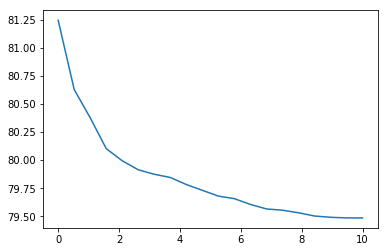

In [36]:

def accuracy(C):
    model = LogisticRegression(C=C)
    model.fit(X_train[0:N], Y_train[0:N])
    Y_test_predicted = model.predict(X_test)
    return 100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted)
I=np.linspace(0.001,10,20)
T=np.array([accuracy(C) for C in I])
plt.plot(I,T)

In [13]:
model = LogisticRegression(C=0.1)
#model.fit(model.fit(X_train[0:N], Y_train[0:N])
model.fit(X_train[0:N], Y_train[0:N])


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

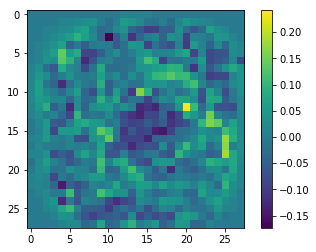

In [14]:
#C=0.1
plt.imshow(model.coef_[0].reshape(28, 28))
plt.colorbar()

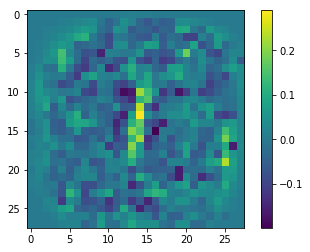

In [16]:
plt.imshow(model.coef_[1].reshape(28, 28))
plt.colorbar()

In [17]:
#C=100
model2 = LogisticRegression(C=100)
#model.fit(model.fit(X_train[0:N], Y_train[0:N])
model2.fit(X_train[0:N], Y_train[0:N])

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

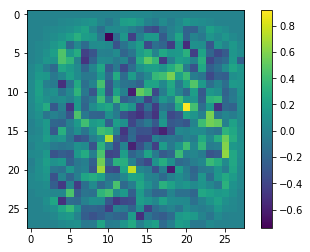

In [19]:
plt.imshow(model2.coef_[0].reshape(28, 28))
plt.colorbar()

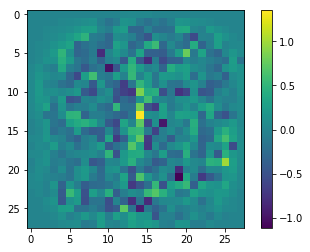

In [20]:
plt.imshow(model2.coef_[1].reshape(28, 28))
plt.colorbar()

In [ ]:
L4.b

Niech C będzie zmieną losową, która odpowiada za katygorię a c pewną z katygori 

Mając dany jakiś $F_1,...,F_n$ zmienych danych zakładamy ,że są niezależne więc dostajemy

$$P(C|F_1,...,F_n)=1/Z*P(C)*P(F_1)*...*P(F_n)\text{ gdzie z jest wpółczynikiem skalowania niezależnym od thety}$$ 

Nasza estymacja będzie polegała na dla danego wektora $(x_1,...,x_n)$ będziemy poszukiwali takiego C, które zmaksymalizuje wyrażenie

$$P(C|F_1,...,F_n)=1/Z*P(C)*P(F_1=x_1|C)*...*P(F_n=x_n |C)$$

Jest to równoważne z 
    
$$argmax_C log(1/Z)+log(P(C))+log(P(F_1=x_1|C=c))+...+log(P(F_n=x_n |C=c))$$

By znaleść rozwiązanie wystarczy policzyć pochodną tego wyrażenia po C i przyrównać ją do zera czyli znaleść rozwiązanie rówania 

$$\frac{1}{\frac{d}{dC}P(C=c)}+\frac{1}{\frac{d}{dC}P(F_1=x_1|C=c)}+...\frac{1}{\frac{d}{dC}P(F_1=x_1|C=c)}+...+\frac{1}{\frac{d}{dC}P(F_n=x_n|C=c)}=0$$

By to zrobić potrzebujemy już widać jak wyglądają prawdopodobieństwa poszczególnych katygorii (wiedza apriori) oraz jakie są rozkłady prawdopodonieństwa w dla poszczególnych wpółrzędnych w wektorze przy danym C by muc polic


